This is the assignment of Machine Learning Foundation 2016, given by Prof. Hsuan-Tien Lin, Dept. of CSIE, NTU

[Original link](https://www.csie.ntu.edu.tw/~htlin/course/mlfound16fall/hw3.5)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def LoadData(path):
    arr = np.loadtxt(path)
    return np.c_[np.ones(len(arr)), arr[:,0:-1]], arr[:,-1] # x and y

#logistic function
def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

#Error rate (0/1 error)
def Err(w, x, y):
    s = np.dot(w, x.T)
    yp = np.where(s>=0,1.0,-1.0)
    Eout = np.sum(yp!=y) / len(y)
    return Eout

### Experiments with Logistic Regression 

<ol start="11">
  <li>Implement the **fixed learning rate gradient descent algorithm** below for logistic regression, initialized with 0. Run the algorithm with $\eta = 0.001$ and $T = 2000$ on the following set for training: [hw3_train.dat](http://www.csie.ntu.edu.tw/~htlin/course/ml15fall/hw3/hw3_train.dat) and the following set for testing: [hw3_test.dat](http://www.csie.ntu.edu.tw/~htlin/course/ml15fall/hw3/hw3_test.dat). What is the weight vector within your $g$? What is the $E_{out}(g)$ from your algorithm, evaluated using the 0/1 error on the test set? 
    </li>
</ol>

<ol start="12">
  <li>Implement the **fixed learning rate stochastic gradient descent algorithm** below for logistic regression, initialized with 0. Instead of randomly choosing $n$ in each iteration, please simply pick the example with the cyclic order $n = 1,2,...,N,1,2,...$.Run the algorithm with $\eta = 0.001$ and $T = 2000$ on the following set for training: [hw3_train.dat](http://www.csie.ntu.edu.tw/~htlin/course/ml15fall/hw3/hw3_train.dat) and the following set for testing: [hw3_test.dat](http://www.csie.ntu.edu.tw/~htlin/course/ml15fall/hw3/hw3_test.dat). What is the weight vector within your g? What is the $E_{out}(g)$ from your algorithm, evaluated using the 0/1 error on the test set? 
    </li>
</ol>

In [3]:
eta = 0.001
T = 2000
    
# gradient of GD
def grad_GD(w, x, y):
    k = np.dot(w, x.T)*-y
    theta = sigmoid(k)
    s = (-1) * y.reshape(-1,1) * theta.reshape(-1,1) * x
    return s.sum(axis=0) / len(x)

# gradient of SGD
def grad_SGD(w, x, y):
    k = np.dot(w, x.T)*-y
    s = (-y) * sigmoid(k) * x
    return s
   
#load data   
x, y = LoadData("hw3_train.dat")
xt, yt = LoadData("hw3_test.dat")
dim = len(x[0])   # dimension
N = len(x)        # size of training data

#Iniialization
w1 = np.zeros(dim)
w2 = np.zeros(dim)

#loop
begin = time.time()
for _ in range(T):
    w1 = w1 - eta*grad_GD(w1, x, y)
t_GD = time.time()-begin

begin = time.time()
for i in range(T):
    w2 = w2 - eta*grad_SGD(w2, x[i%N], y[i%N])
t_SGD = time.time()-begin

print("11. gradient descent:")
print("w =", w1)
print("Eout =", Err(w1, xt, yt))
print("-------------", t_GD,"sec used -------------")
print()
print("12. stochastic gradient descent:")
print("w =", w2)
print("Eout =", Err(w2, xt, yt))
print("-------------", t_SGD,"sec used -------------")

11. gradient descent:
w = [ 0.01878417 -0.01260595  0.04084862 -0.03266317  0.01502334 -0.03667437
  0.01255934  0.04815065 -0.02206419  0.02479605  0.06899284  0.0193719
 -0.01988549 -0.0087049   0.04605863  0.05793382  0.061218   -0.04720391
  0.06070375 -0.01610907 -0.03484607]
Eout = 0.475
------------- 0.30645251274108887 sec used -------------

12. stochastic gradient descent:
w = [ 0.01826899 -0.01308051  0.04072894 -0.03295698  0.01498363 -0.03691042
  0.01232819  0.04791334 -0.02244958  0.02470544  0.06878235  0.01897378
 -0.02032107 -0.00901469  0.04589259  0.05776824  0.06102487 -0.04756147
  0.06035018 -0.01660574 -0.03509342]
Eout = 0.473
------------- 0.01300954818725586 sec used -------------


### Regularized Linear Regression and Validation
Consider regularized linear regression (also called ridge regression) for classification. 

$$w_{reg} = argmin_w \dfrac{\lambda}{N} \lVert w \rVert^2 + \dfrac{1}{N} \lVert Xw-y\rVert^2 $$

Run the algorithm on the following data set as $D$: [hw4_train.dat](http://www.csie.ntu.edu.tw/~htlin/course/ml15fall/hw4/hw4_train.dat) and the following set for evaulating $E_{out}$: [hw4_test.dat](http://www.csie.ntu.edu.tw/~htlin/course/ml15fall/hw4/hw4_test.dat). Because the data sets are for classification, please consider only the 0/1 error for all the problems below. 


<ol start="13">
  <li>Let $\lambda = 1.126$, what is the corresponding $E_{in}$ and $E_{out}$? 
    </li>
</ol>

In [4]:
# logistic with regularization
# reference: https://en.wikipedia.org/wiki/Tikhonov_regularization
def lgr(X, y, lambd):
    w = np.dot(np.linalg.inv(np.dot(X.T, X) + lambd*np.eye(len(X[0]))), X.T)
    return np.squeeze(np.dot(w, y.reshape((-1, 1))))

#load data   
x, y = LoadData("hw4_train.dat")
xt, yt = LoadData("hw4_test.dat")

lambd = 1.126
wreg = lgr(x, y, lambd)

print("13. Ein = ", Err(wreg, x, y),", Eout = ", Err(wreg, xt, yt))


13. Ein =  0.035 , Eout =  0.02


<ol start="14">
  <li>Plot the curve of $E_{in}$ with respect to $log_{10} \lambda = \{2,1,0,-1,...,-8,-9,-10\}$. What is the $\lambda$ with the minimum $E_{in}$? What is $E_{out}(g_{\lambda})$ on such $\lambda$? Break the tie by selecting the largest $\lambda$. 
    </li>
</ol>

<ol start="15">
  <li>Plot the curve of $E_{out}$ with respect to $log_{10} \lambda = \{2,1,0,-1,...,-8,-9,-10\}$. What is the $\lambda$ with the minimum $E_{out}$? Break the tie by selecting the largest $\lambda$. 
    </li>
</ol>

14.
Minimum Ein = 0.015 occurs when log(lambda) = [ -8  -9 -10] , Eout = [0.02 0.02 0.02]

15.
Minimum Eout = 0.015 occurs when log(lambda) = [-7] , Ein = [0.03]



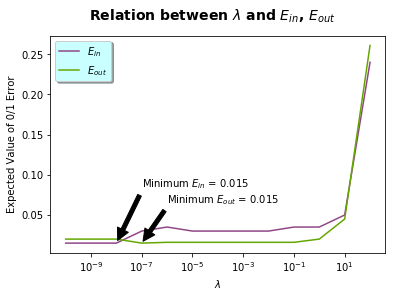

In [5]:
logLambda = np.array(range(2, -11, -1))
Nld = len(logLambda)
Lambda = np.power(10*np.ones(Nld), np.array(logLambda))
ErrList = np.zeros((Nld,2))

for i in range(Nld):
    wreg = lgr(x, y, Lambda[i])
    ErrList[i] = [Err(wreg, x, y), Err(wreg, xt, yt)]

Ein, Eout = ErrList[:,0], ErrList[:,1]
mEin, mEout = Ein.min(), Eout.min()
mEinI = np.array([i for i in range(Nld) if Ein[i] == mEin])
mEoutI = np.array([i for i in range(Nld) if Eout[i] == mEout])

print("14."), print("Minimum Ein =",  mEin,  "occurs when log(lambda) =", logLambda[mEinI],  ", Eout =", Eout[mEinI]), print()
print("15."), print("Minimum Eout =", mEout, "occurs when log(lambda) =", logLambda[mEoutI], ", Ein =",  Ein[mEoutI]), print()

fig = plt.figure()
fig.suptitle("Relation between " + r"$\lambda$" + " and "+r"$E_{in}$"+", "+r"$E_{out}$", fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
plt.plot(Lambda, Ein, 'k', label=r"$E_{in}$", color='#8F4586')
plt.plot(Lambda, Eout, 'k', label=r"$E_{out}$", color='#64A600')
legend = plt.legend(loc='upper left', shadow=True)
ax.annotate('Minimum '+r"$E_{in}$"+' = ' + str(mEin), xy=(Lambda[mEinI].max(), mEin), xytext=(Lambda[mEinI].max()*10, mEin+0.07),
 arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Minimum '+r"$E_{out}$"+' = ' + str(mEout), xy=(Lambda[mEoutI].max(), mEout), xytext=(Lambda[mEoutI].max()*10, mEin+0.05),
 arrowprops=dict(facecolor='black', shrink=0.05))
plt.ylabel('Expected Value of 0/1 Error'), plt.xlabel(r"$\lambda$")
ax.set_xscale('log')
legend.get_frame().set_facecolor('#CAFFFF')

Now split the given training examples in $D$ to the first 120 examples for $D_{train}$ and 80 for $D_{val}$. Ideally, you should randomly do the $120/80$ split. Because the given examples are already randomly permuted, however, we would use a fixed split for the purpose of this problem. Run the algorithm on $D_{train}$ to get $g_{\lambda}^{-}$, and validate $g_{\lambda}^{-}$ with $D_{val}$. 

<ol start="16">
  <li>
      Plot $E_{train}(g_{\lambda}^{-})$ with respect to $log_{10} \lambda = \{2,1,0,-1,...,-8,-9,-10\}$. What is the $\lambda$ with the minimum $E_{train}(g_{\lambda}^{-})$? What is $E_{out}(g_{\lambda}^{-})$ on such $\lambda$? Break the tie by selecting the largest $\lambda$. 
    </li>
</ol>

<ol start="17">
  <li>
      Plot $E_{val}(g_{\lambda}^{-})$ with respect to $log_{10} \lambda = \{2,1,0,-1,...,-8,-9,-10\}$. What is the $\lambda$ with the minimum $E_{val}(g_{\lambda}^{-})$? What is $E_{out}(g_{\lambda}^{-})$ on such $\lambda$? Break the tie by selecting the largest $\lambda$. 
    </li>
</ol>

16.
Minimum Etrain = 0.0 occurs when log(lambda) = [-8 -9] , Eout = [0.025 0.038]

17.
Minimum Eval = 0.0375 occurs when log(lambda) = [ 0 -1 -2 -3 -4 -5 -6 -7] , Eout = [0.028 0.022 0.021 0.021 0.021 0.021 0.021 0.021]


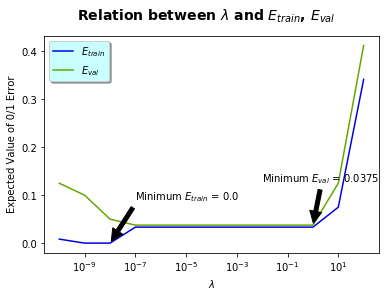

In [6]:
xtr, xv = x[0:120], x[120:200]
ytr, yv = y[0:120], y[120:200]
Error = np.zeros((Nld,3)) #Ein, Eval, Eout

for i in range(Nld):
    wreg = lgr(xtr, ytr, Lambda[i])
    Error[i] = [Err(wreg, xtr, ytr), Err(wreg, xv, yv), Err(wreg, xt, yt)]
    
Ein, Eval, Eout = Error[:,0], Error[:,1], Error[:,2]
mEin, mEval = Ein.min(), Eval.min()
mEinI = np.array([i for i in range(Nld) if Ein[i] == mEin])
mEvalI = np.array([i for i in range(Nld) if Eval[i] == mEval])
        
print("16."), print("Minimum Etrain =", mEin,  "occurs when log(lambda) =", logLambda[mEinI],  ", Eout =", Eout[mEinI])
print()
print("17."), print("Minimum Eval =",   mEval, "occurs when log(lambda) =", logLambda[mEvalI], ", Eout =", Eout[mEvalI])

fig2 = plt.figure()
fig2.suptitle("Relation between " + r"$\lambda$" + " and "+ r"$E_{train}$"+", "+ r"$E_{val}$", fontsize=14, fontweight='bold')
ax = fig2.add_subplot(111)
plt.plot(Lambda, Ein, 'k', label=r"$E_{train}$", color='#0000E3')
plt.plot(Lambda, Eval, 'k', label=r"$E_{val}$", color='#64A600')
legend = plt.legend(loc='upper left', shadow=True)
ax.annotate('Minimum ' +r"$E_{train}$"+' = ' + str(mEin), xy=(Lambda[mEinI].max(), mEin), xytext=(Lambda[mEinI].max()*10, mEin+0.09),
 arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Minimum ' +r"$E_{val}$"+' = ' + str(mEval), xy=(Lambda[mEvalI].max(), mEval), xytext=(Lambda[mEvalI].max()/100, mEval+0.09),
 arrowprops=dict(facecolor='black', shrink=0.05))
plt.ylabel('Expected Value of 0/1 Error'), plt.xlabel(r"$\lambda$")
ax.set_xscale('log')
legend.get_frame().set_facecolor('#CAFFFF')

<ol start="18">
  <li>
      Run the algorithm with the optimal $\lambda$ of the previous problem on the whole $D$ to get $g_{\lambda}^{-}$. What is $E_{in}(g_{\lambda})$ and $E_{out}(g_{\lambda})$?  
    </li>
</ol>

In [7]:
wreg = lgr(x, y, Lambda[mEvalI].max())
print("18.")
print("For the wreg with optimal lambda achieved in Q17 and trained in whole data:")
print("Ein = ", Err(wreg, x, y),", Eout = ", Err(wreg, xt, yt))

18.
For the wreg with optimal lambda achieved in Q17 and trained in whole data:
Ein =  0.035 , Eout =  0.02


Now split the given training examples in $D$ to five folds, the first 40 being fold 1, the next 40 being fold 2, and so on. Again, we take a fixed split because the given examples are already randomly permuted. 

<ol start="19">
  <li>
Plot $E_{cv}$ with respect to $log_{10} \lambda = \{2,1,0,-1,...,-8,-9,-10\}$. What is the $\lambda$ with the minimum Ecv, where $E_{cv}$ comes from the five folds defined above? Break the tie by selecting the largest $\lambda$. 
    </li>
</ol>

19.
Minimum Ecv = 0.03 occurs when log(lambda) = -8


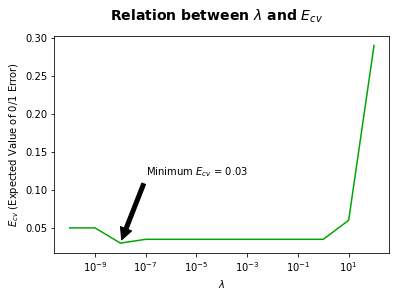

In [8]:
Ecv = np.zeros(Nld)
fold = 5
for i in range(Nld):
    for j in range(fold):        
        xTrn, yTrn = np.delete(x, np.s_[40*j:40*(j+1)], axis = 0 ), np.delete(y, np.s_[40*j:40*(j+1)], axis = 0 )
        xVal, yVal = x[40*j:40*(j+1)], y[40*j:40*(j+1)]
        wreg = lgr(xTrn, yTrn, Lambda[i])
        Ecv[i] += Err(wreg, xVal, yVal)/fold


mEcv = Ecv.min()
mEcvI = np.array([i for i in range(Nld) if Ecv[i] == mEcv])
        
print("19."), print("Minimum Ecv =", mEcv,"occurs when log(lambda) =",logLambda[mEcvI].max())
     
fig3 = plt.figure()
fig3.suptitle("Relation between " + r"$\lambda$" + " and " + r"$E_{cv}$", fontsize=14, fontweight='bold')
ax = fig3.add_subplot(111)
plt.plot(Lambda, Ecv, 'k', label='Etrain', color='#00A600')
ax.annotate('Minimum '+ r"$E_{cv}$"+' = ' + str(mEcv), xy=(Lambda[mEcvI], mEcv), xytext=(Lambda[mEcvI]*10, mEcv+0.09),
 arrowprops=dict(facecolor='black', shrink=0.05))
plt.ylabel(r'$E_{cv}$'+' (Expected Value of 0/1 Error)'), plt.xlabel(r"$\lambda$")
ax.set_xscale('log')

<ol start="20">
  <li>
Run the algorithm with the optimal $\lambda$ of the previous problem on the whole $D$ to get $g_{\lambda}$. What is $E_{in}(g_{\lambda})$ and $E_{out}(g_{\lambda})$? 
    </li>
</ol>

In [9]:
wreg = lgr(x, y, Lambda[mEcvI])
print("20."), print("For the wreg with optimal lambda achievd in Q19 and trained in whole data:")
print("Ein = ", Err(wreg, x, y),", Eout = ", Err(wreg, xt, yt))

20.
For the wreg with optimal lambda achievd in Q19 and trained in whole data:
Ein =  0.015 , Eout =  0.02
